## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#The number of times the new_page and treatment don't line up
# the number of 'new_page' with 'control' + the number of 'old_page' with 'treatment'                        
df[(df['landing_page']=="new_page")&(df['group']=="control")].shape[0]+df[(df['landing_page']=="old_page")&(df['group']=="treatment")].shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df_new=df[(df['landing_page']=="new_page")&(df['group']=="treatment")]
df_old=df[(df['landing_page']=="old_page")&(df['group']=="control")]

In [9]:
df2=df_new.append(df_old)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(index=2893,inplace=True)

In [16]:
df2.reindex()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2[df2['group']=="control"].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2[df2['group']=="treatment"].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2[df2['landing_page']=="new_page"].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No, from now on, the analysis is not sufficient to make this conclusion.**

**Firstly,from the question a, the probability of an individual converting is 11.96%, showing the majority of users tend to stay on the page that they firstly landing.**

**Secondly, the probabily of converted in both groups are 12.04% (the control group) and  11.88%(the treatment group).They seem to be no significant differences. But further statistical significance analysis are needed to verify this conclusion.**

**Finally,the practical matters like changing aversion and novelty effect are worth to be consideration.But this should be discussed after the A/B test.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis: **$p_{old}$** >= **$p_{new}$** , that is  **$p_{new}$** - **$p_{old}$** <=0

**Alternative hypothesis: **$p_{old}$** < **$p_{new}$** , that is  **$p_{new}$** - **$p_{old}$** >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#under the null, p_new=p_old=the converted success rate regardless of page
df2.converted.mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new=df2[df2['landing_page']=="new_page"].shape[0]

d. What is $n_{old}$?

In [24]:
n_old=df2[df2['landing_page']=="old_page"].shape[0]

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted=df2.sample(n_new,replace=True)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted=df2.sample(n_old,replace=True)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.converted.mean()-old_page_converted.converted.mean()

-0.00025683725116837364

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs=[]
for _ in range(10000):
    boot_sample=df2.sample(df2.shape[0],replace=True)
    new_page_converted=boot_sample[boot_sample['landing_page']=="new_page"]
    oldw_page_converted=boot_sample[boot_sample['landing_page']=="old_page"]
    diff=new_page_converted.converted.mean()-old_page_converted.converted.mean()
    p_diffs.append(diff)
    
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  14.,  104.,  640., 1882., 2930., 2716., 1318.,  347.,   43.,
           6.]),
 array([-0.00443715, -0.00376872, -0.00310029, -0.00243186, -0.00176343,
        -0.00109501, -0.00042658,  0.00024185,  0.00091028,  0.00157871,
         0.00224714]),
 <a list of 10 Patch objects>)

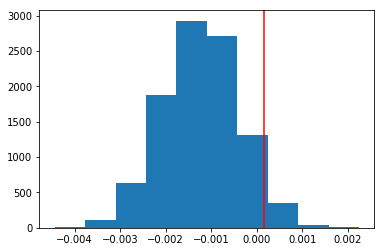

In [29]:
#plot sampling distribution 
#look at if the interval falls in the null hypothesis space or in the alternative hypothesis space
upper=np.percentile(p_diffs,95)
plt.axvline(x=upper,color="r")
plt.hist(p_diffs)

**Using the 95% confidence interval, the interval falls in the null hypothesis space which indicates the null hypothesis is highly possible.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#actual difference observed is obs_diff
ob_diffs=df2[df2['landing_page']=="new_page"].converted.mean()-df2[df2['landing_page']=="old_page"].converted.mean()
p_std=p_diffs.std()
ob_diffs

-0.0015782389853555567

In [31]:
#if null hypothesis is true,the difference between is 0
null_val=np.random.normal(0,p_std,p_diffs.size)

(array([  10.,   96.,  446., 1406., 2473., 2790., 1865.,  718.,  168.,
          28.]),
 array([-0.00324025, -0.00261988, -0.00199951, -0.00137914, -0.00075877,
        -0.0001384 ,  0.00048197,  0.00110234,  0.0017227 ,  0.00234307,
         0.00296344]),
 <a list of 10 Patch objects>)

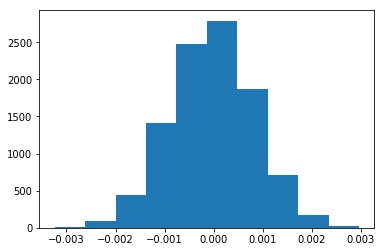

In [32]:
plt.hist(null_val)

In [33]:
#alternative hypothesis is pnew-pold>0,that
#calculating p value
(null_val>ob_diffs).mean()

0.9656

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j, I simulated distribution under the null hypothesis that the difference in contverted between two groups is 0 and computed p-value. And the result showed p-value is equal to 0.9656 and larger than 0.05.This means we failed to reject the null hypothesis and can make a conclusion that the new pages do not better than old page, based on the converted analysis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=="old_page"].converted.sum()
convert_new = df2[df2['landing_page']=="new_page"].converted.sum()
n_old = df2[df2['landing_page']=="old_page"].shape[0]
n_new = df2[df2['landing_page']=="new_page"].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#p1 is the old-pages group, p2 is the new-pages group
nob_com=np.array([n_old,n_new])
count_com=np.array([convert_old,convert_new])

In [36]:
from statsmodels.stats.proportion import proportions_ztest
#alternative hypothesis is pnew-pold>0 --> pold<pnew -->p1<p2, means prop < value 
proportions_ztest(count_com,nob_com,alternative='smaller')

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**In part m, z-score and p-value are 1.311 and 0.905, respectively. p-value is larger than 0.05 which means we failed to reject null hypothesis. This conclusion is consistent with findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We should perform an logistic regression to fit the dataset.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept']=1
df2[['control','treatment']]=pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
mod=sm.OLS(df2['converted'],df2[['intercept','treatment']])
results=mod.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Tue, 12 Mar 2019   Prob (F-statistic):              0.190
Time:                        22:49:38   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
treatment     -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The null hypothesis in regresion model is the slope is equal to zero which means no significant linear relationship between the independent variable X and the dependent variable Y**

**The p-value for treatment group is 0.190, which is larger than 0.05. This means we fail to reject null hypothesis and demonstrate whether users would convert are not group dependent.**

**Based on premise that users in treatment group will land on new pages and users in control group will land on old pages. In part II,we have demonstrated that according to the number of user converted, the new page is not better than the old page.Here, we concluded the whether converted or not is not significatly dependent on which groups users are(the same as which pages users landed on).The conclusion here and part II are not contradictory, but not exactly same.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**One thing we need to consider is how many old and new users occupied in each group.It is reasonble for old users to convert from new page to old page, because they are used to that. If more new users choose to convert to new page in control group, indicading the new page is better.**

**When we add additional variables to regression, one of disadvantages we need to consider is the multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [41]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])

In [43]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [44]:
mod_country=sm.OLS(df_new['converted'],df_new[['intercept','UK','US']])

In [45]:
result_country=mod_country.fit()
result_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Tue, 12 Mar 2019   Prob (F-statistic):              0.201
Time:                        22:49:45   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1195      0.001    166.244      0.000       0.118       0.121
UK            -0.0042      0.003     -1.516      0.130      -0.010       0.001
US             0.0010      0.001      0.746      0.455      -0.002       0.004
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         4.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Althrough results showed keep other parameters constant, compared with 'CA' group, less users in 'UK' group  and more users in 'US' group convert, both the p-values (0.130 and 0.455) are larger than 0.05 means there is no statistical significant for converted.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

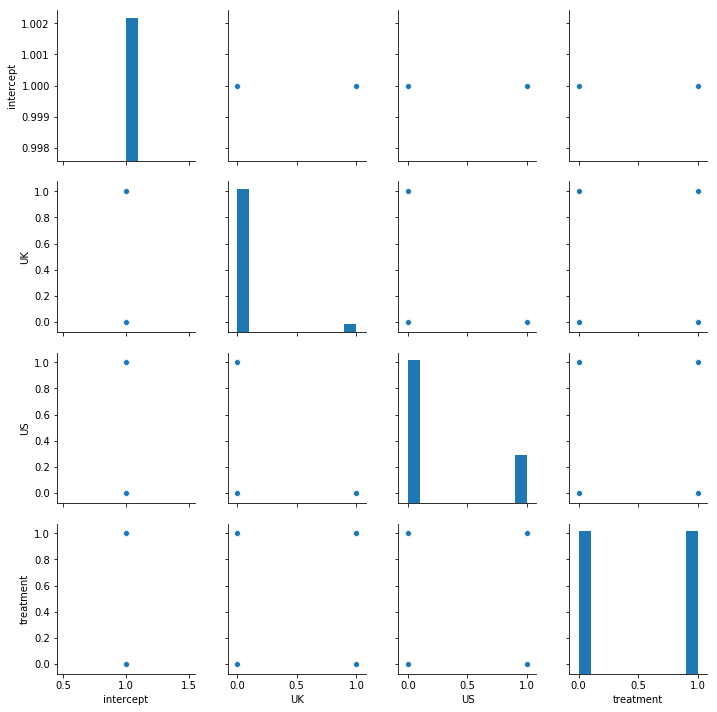

In [46]:
import seaborn as sb
fig=sb.pairplot(df_new[['intercept','UK','US','treatment']])

In [47]:
### Fit Your Linear Model And Obtain the Results
mod_combined=sm.OLS(df_new['converted'],df_new[['intercept','UK','US','treatment']])
result_combined=mod_combined.fit()
result_combined.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Tue, 12 Mar 2019   Prob (F-statistic):              0.178
Time:                        22:50:31   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1203      0.001    128.267      0.000       0.118       0.122
UK            -0.0042      0.003     -1.514      0.130      -0.010       0.001
US             0.0010      0.001      0.744      0.457      -0.002       0.004
treatment     -0.0016      0.001     -1.307      0.191      -0.004       0.001
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**When new variables are added to regression, the multicollinearity is worth considering. So, I first used the bivariate plot to check if there exsits relationships among independent variables.The figure showed no multicollinearity between two of independent variables.**

**Logistic regression models were developed and fitted.Comparing with control group while keeping other variables constant, treatment group had a lower number of users converted pages. But similar as analysis for countries, p-value for groups was larger than 0.05 and meaning no statistically significant relation between groups and whether users would convert or not.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.